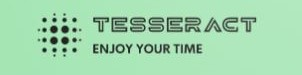

The following notebook will execute several sql querys to get a better understanding of some insights that could be investigated

In [1]:
import sys
import os
import pandas as pd

module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path+"\\src")

from dbmodules import Database
from dbmodules import Database

In [2]:

user=
password=
host=
dbname=

db = Database(user,password,host,dbname)

Db instance created


In [79]:
# Order Status , Times , Total of orders < That has an delivery date after the estimated delivery date
query1= "select order_status,count(order_status) as orderoverestimated,(select count(orders) from orders  ) as numberoforders \
from orders o \
where \
order_estimated_delivery_date < order_delivered_customer_date \
group by order_status"

query2 = "select op.payment_type paymenttype,c.customer_city city,count(o.order_id) noforders \
from \
customers c  \
inner join \
orders o \
on o.customer_id = c.customer_id \
inner join \
order_payments op \
on op.order_id = o.order_id \
group by  op.payment_type,c.customer_city  "


query3 = "select op.payment_type paymenttype,c.customer_state  state,count(o.order_id) noforders \
from \
customers c \
inner join \
orders o \
on o.customer_id = c.customer_id \
inner join \
order_payments op \
on op.order_id = o.order_id \
group by  op.payment_type,c.customer_state \
order by state ,noforders desc  "






query4 = "select c.customer_state  state,count(o.order_id) NofOrders \
from \
customers c \
inner join \
orders o  \
on o.customer_id = c.customer_id  \
group by  c.customer_state \
order by NofOrders desc "

query5 = "select c.customer_city  city,count(o.order_id) NofOrders \
from \
customers c  \
inner join \
orders o  \
on o.customer_id = c.customer_id  \
group by  c.customer_city \
order by NofOrders desc "


query6 = " select s.seller_state  state,count(o.order_id) NofOrders \
from \
sellers s  \
inner join \
order_items oi   \
on oi.seller_id = s.seller_id  \
inner join \
orders o \
on oi.order_id = o.order_id \
group by  s.seller_state \
order by NofOrders desc "

query7 = "select s.seller_city  city,count(o.order_id) NofOrders \
from \
sellers s   \
inner join \
order_items oi   \
on oi.seller_id = s.seller_id  \
inner join  \
orders o  \
on oi.order_id = o.order_id  \
group by  s.seller_city \
order by NofOrders desc "

query8 = " select c.customer_state  state,( cast( count(oi.order_id) as FLOAT ) / cast( count( distinct(oi.order_id)) as FLOAT))  NofOrders \
from \
customers c    \
inner join \
orders o  \
on o.customer_id = c.customer_id   \
inner join \
order_items oi  \
on  o.order_id = oi.order_id \
group by  c.customer_state \
order by NofOrders desc "


query9 = "select s.seller_state,p.product_category_name, count(oi.order_id) NofSales, \
( select count(oi.order_id) TotalofSales  \
from \
order_items oi \
inner join \
sellers a  \
on oi.seller_id = a.seller_id  \
where a.seller_state = s.seller_state ) \
from \
products p  \
inner join \
order_items oi  \
on oi.product_id = p.product_id  \
inner join sellers s  \
on s.seller_id = oi.seller_id  \
group by p.product_category_name ,s.seller_state \
order by s.seller_state,NofSales DESC"

query10 = " select p.product_category_name, avg(or2.review_score) as score \
from \
products p \
inner join \
order_items oi \
on \
p.product_id = oi.product_id \
inner join \
order_reviews or2 \
on \
or2.order_id = oi.order_id \
group by p.product_category_name \
order by score desc "

query11 = "select p.product_category_name, avg(or2.review_score) as score, \
( select count(price)+count(freight_value) as avg_totalcost \
from order_items \
inner join \
products p2 \
on p2.product_id = order_items.product_id \
where p2.product_category_name  = p.product_category_name ) \
from \
products p  \
inner join \
order_items oi \
on \
p.product_id = oi.product_id \
inner join \
order_reviews or2 \
on \
or2.order_id = oi.order_id \
group by p.product_category_name \
order by score,avg_totalcost desc "


query12 = "select s.seller_id, avg(or2.review_score) as avg_reviews,count(or2.review_score) as nofreviews \
from \
sellers s \
inner join \
order_items oi  \
on  \
oi.seller_id = s.seller_id  \
inner join order_reviews or2 \
on or2.order_id = oi.order_id \
group by s.seller_id \
order by avg_reviews DESC "

query13 = "select s.seller_state as sstate,c.customer_state as cstate ,avg(o.order_delivered_customer_date - o.order_purchase_timestamp) as avgdeliverytime \
from \
orders o \
inner join  \
customers c \
on \
c.customer_id = o.customer_id  \
inner join \
order_items oi  \
on \
oi.order_id = o.order_id \
inner join \
sellers s \
on \
s.seller_id = oi.seller_id \
group by s.seller_state , c.customer_state "

query14 = "select s.seller_state as sstate,c.customer_state as cstate ,avg(o.order_delivered_customer_date - o.order_purchase_timestamp) as avgdeliverytime \
from \
orders o \
inner join  \
customers c \
on \
c.customer_id = o.customer_id  \
inner join \
order_items oi  \
on \
oi.order_id = o.order_id  \
inner join  \
sellers s  \
on \
s.seller_id = oi.seller_id  \
where s.seller_state  = c.customer_state  \
group by s.seller_state , c.customer_state "

query15="select count(o.order_delivered_customer_date),avg(o.order_estimated_delivery_date-o.order_delivered_customer_date),count(o.order_delivered_customer_date)::FLOAT/(select count(order_delivered_customer_date) from orders)::FLOAT as percentimpact \
from \
orders o  \
where \
o.order_estimated_delivery_date < o.order_delivered_customer_date "

query16 = "select s.seller_state as sstate,c.customer_state as cstate ,avg(o.order_delivered_customer_date - o.order_purchase_timestamp) as avgdeliverytime,avg(or2.review_score) \
from \
orders o \
inner join \
customers c \
on \
c.customer_id = o.customer_id  \
inner join \
order_items oi \
on \
oi.order_id = o.order_id  \
inner join \
sellers s \
on \
s.seller_id = oi.seller_id \
left join \
order_reviews or2 \
on \
o.order_id = or2.order_id \
where s.seller_state  = c.customer_state \
group by s.seller_state , c.customer_state "

query17 = "select s.seller_state as sstate,c.customer_state as cstate ,avg(o.order_delivered_customer_date - o.order_purchase_timestamp) as avgdeliverytime,avg(or2.review_score) \
from \
orders o \
inner join  \
customers c \
on \
c.customer_id = o.customer_id  \
inner join \
order_items oi  \
on \
oi.order_id = o.order_id  \
inner join \
sellers s \
on \
s.seller_id = oi.seller_id \
left join \
order_reviews or2 \
on \
o.order_id = or2.order_id \
where s.seller_state  = c.customer_state \
group by s.seller_state , c.customer_state "


query18 = "select s.seller_state as sstate,c.customer_state as cstate ,avg(o.order_delivered_customer_date - o.order_purchase_timestamp) as avgdeliverytime,avg(or2.review_score) \
from \
orders o \
inner join  \
customers c \
on \
c.customer_id = o.customer_id \
inner join \
order_items oi \
on \
oi.order_id = o.order_id \
inner join \
sellers s \
on \
s.seller_id = oi.seller_id \
left join \
order_reviews or2 \
on \
o.order_id = or2.order_id \
where s.seller_state  != c.customer_state \
group by sstate,cstate"

query19 ="select avg(o.order_delivered_customer_date - o.order_purchase_timestamp) as avgdeliverytime,avg(or2.review_score) score \
from \
orders o \
inner join \
customers c \
on \
c.customer_id = o.customer_id  \
inner join \
order_items oi  \
on \
oi.order_id = o.order_id  \
inner join  \
sellers s  \
on \
s.seller_id = oi.seller_id  \
left join  \
order_reviews or2 \
on \
o.order_id = or2.order_id \
where s.seller_state  = c.customer_state "

query20 = "select c.customer_state,s.seller_state,avg(or2.review_score) as avgreview \
from \
orders o \
inner join \
customers c \
on \
c.customer_id = o.customer_id  \
inner join \
order_items oi \
on \
oi.order_id = o.order_id \
inner join \
sellers s \
on \
s.seller_id = oi.seller_id \
left join \
order_reviews or2 \
on \
o.order_id = or2.order_id \
group by c.customer_state,s.seller_state"

query21 = "select c.customer_state,avg(or2.review_score) as avgreview \
from \
orders o \
inner join \
customers c \
on \
c.customer_id = o.customer_id  \
inner join \
order_items oi \
on \
oi.order_id = o.order_id \
inner join \
sellers s \
on \
s.seller_id = oi.seller_id \
left join \
order_reviews or2 \
on \
o.order_id = or2.order_id \
group by c.customer_state"

query22 = "select s.seller_state,avg(or2.review_score) as avgreview \
from \
orders o \
inner join \
customers c \
on \
c.customer_id = o.customer_id \
inner join \
order_items oi \
on \
oi.order_id = o.order_id \
inner join \
sellers s \
on \
s.seller_id = oi.seller_id \
left join \
order_reviews or2 \
on \
o.order_id = or2.order_id \
group by s.seller_state"


In [ ]:
#orders that has been delivered over the estimated time

db.fetchByQuery(query1)

The ETA of the products has an 7.8% of error

The possible canceled orders are not due the time to deliver because its only 1:7827

In [15]:
#top payment methods by city 
table=db.fetchByQuery(query2)
df_table = pd.DataFrame(table)

# Most used debit card * The payment its over the total its not a rate total_debit/total_payments
print("-------------")
print(df_table[df_table[0]=='debit_card'].sort_values(by=2, ascending=False).head())
# Most used credit card * The payment its over the total its not a rate total_credit/total_payments
print("-------------")
print(df_table[df_table[0]=='credit_card'].sort_values(by=2, ascending=False).head())
# Most used credit boleto * The payment its over the total its not a rate total_boleto/total_payments
print("-------------")
print(df_table[df_table[0]=='boleto'].sort_values(by=2, ascending=False).head())
# Most used credit vocher * The payment its over the total its not a rate total_voucher/total_payments
print("-------------")
print(df_table[df_table[0]=='voucher'].sort_values(by=2, ascending=False).head())




('voucher', 'tres lagoas', 3)
('debit_card', 'capao da porteira', 1)
('debit_card', 'afranio', 1)
('voucher', 'almirante tamandare', 2)
('boleto', 'pirapora do bom jesus', 1)
('credit_card', 'taruma', 7)
('boleto', 'antonio carlos', 1)
('boleto', 'ipaba', 1)
('boleto', 'atalanta', 1)
('credit_card', 'itirucu', 3)
('credit_card', 'camutanga', 3)
('credit_card', 'coluna', 2)
('credit_card', 'campo bonito', 1)
('credit_card', 'pimenteiras', 2)
('credit_card', 'sao mateus do sul', 11)
('boleto', 'orleans', 1)
('credit_card', 'severinia', 3)
('boleto', 'tres coroas', 1)
('boleto', 'ubaitaba', 1)
('credit_card', 'mongagua', 30)
('boleto', 'caxias do sul', 47)
('credit_card', 'pendencias', 2)
('boleto', 'olinda', 14)
('voucher', 'palotina', 2)
('boleto', 'pontal', 7)
('credit_card', 'aparecida de sao manuel', 2)
('voucher', 'queimados', 5)
('credit_card', 'gloria do goita', 2)
('boleto', 'nova trento', 1)
('boleto', 'perola independente', 1)
('voucher', 'taboao da serra', 18)
('voucher', 'ita

('credit_card', 'jequitiba', 2)
('boleto', 'paty do alferes', 3)
('credit_card', 'virginopolis', 8)
('credit_card', 'pinhais', 45)
('boleto', 'placas', 1)
('voucher', 'francisco morato', 3)
('credit_card', 'guaracai', 4)
('credit_card', 'santa rita do itueto', 1)
('credit_card', 'arrozal', 3)
('credit_card', 'itaberai', 5)
('debit_card', 'ipora', 1)
('boleto', 'jau', 15)
('voucher', 'porto velho', 6)
('boleto', 'vacaria', 6)
('credit_card', 'chapadao do lageado', 1)
('credit_card', 'sao jose da barra', 5)
('boleto', 'joao pinheiro', 6)
('voucher', 'tangua', 2)
('voucher', 'picos', 3)
('debit_card', 'serrana', 1)
('boleto', 'japuiba', 1)
('credit_card', 'sao joaquim do monte', 1)
('boleto', 'itajai', 27)
('credit_card', 'paripueira', 1)
('boleto', 'maracai', 1)
('boleto', 'porto murtinho', 1)
('credit_card', 'barbosa ferraz', 3)
('credit_card', 'tambau', 12)
('credit_card', 'siriji', 1)
('boleto', 'palmeira das missoes', 1)
('boleto', 'doutor ulysses', 1)
('boleto', 'itauna', 9)
('bolet

('debit_card', 'morro agudo', 1)
('debit_card', 'jordania', 1)
('credit_card', 'severiano melo', 1)
('debit_card', 'maringa', 1)
('credit_card', 'areal', 7)
('voucher', 'tres fronteiras', 4)
('credit_card', 'marechal deodoro', 1)
('credit_card', 'sao luis do paraitinga', 3)
('credit_card', 'bora', 1)
('boleto', 'iepe', 2)
('boleto', 'tuparetama', 1)
('credit_card', 'sao mateus', 31)
('credit_card', 'macaubal', 1)
('voucher', 'camaragibe', 6)
('boleto', 'caico', 2)
('debit_card', 'santo andre', 13)
('voucher', 'cachoeirinha', 4)
('boleto', 'santana de pirapama', 1)
('credit_card', 'liberdade', 2)
('credit_card', 'agisse', 1)
('boleto', 'conquista', 2)
('debit_card', 'brasilia', 17)
('credit_card', "mirassol d'oeste", 8)
('credit_card', 'correntes', 1)
('credit_card', 'itaiopolis', 5)
('credit_card', 'boquira', 1)
('credit_card', 'passos', 34)
('voucher', 'jundiai', 32)
('credit_card', 'aiuruoca', 3)
('boleto', 'manaira', 1)
('credit_card', 'sao goncalo', 315)
('boleto', 'orlandia', 5)
(

('credit_card', 'estrela d oeste', 1)
('boleto', 'fernandopolis', 9)
('voucher', 'morrinhos', 4)
('credit_card', 'botucatu', 78)
('boleto', 'xanxere', 6)
('boleto', 'sao lourenco do piaui', 1)
('credit_card', 'inhapi', 2)
('credit_card', 'sao jose do vale do rio preto', 12)
('credit_card', 'palminopolis', 1)
('credit_card', 'curral de cima', 1)
('boleto', 'viamao', 11)
('credit_card', 'paial', 1)
('credit_card', 'virgolandia', 2)
('boleto', 'tres arroios', 1)
('credit_card', 'viseu', 1)
('boleto', 'anicuns', 2)
('credit_card', 'placas', 1)
('credit_card', 'taiobeiras', 10)
('voucher', 'belo vale', 1)
('boleto', 'igarape', 2)
('boleto', 'gravata', 6)
('credit_card', 'sao bernardo do campo', 727)
('boleto', 'lagoa santa', 11)
('credit_card', 'seringueiras', 3)
('boleto', 'anastacio', 1)
('voucher', 'ouro fino', 1)
('boleto', 'sumare', 41)
('credit_card', 'santo antonio do planalto', 1)
('credit_card', 'eunapolis', 26)
('boleto', 'missal', 1)
('boleto', 'taua', 1)
('debit_card', 'maua', 9

('credit_card', 'uberlandia', 301)
('credit_card', 'xavantina', 1)
('debit_card', 'arapongas', 1)
('boleto', 'acreuna', 1)
('credit_card', 'sao pedro do sul', 1)
('boleto', 'morretes', 1)
('debit_card', 'barra do corda', 1)
('boleto', 'barra velha', 9)
('credit_card', 'inhuma', 1)
('voucher', 'taquarituba', 1)
('boleto', 'caem', 1)
('credit_card', 'sao gabriel do oeste', 6)
('credit_card', 'pintadas', 2)
('debit_card', 'garca', 1)
('credit_card', 'mairipora', 57)
('boleto', 'guimarania', 3)
('boleto', 'bom jesus do itabapoana', 4)
('credit_card', 'capistrano', 1)
('boleto', 'itamarandiba', 1)
('credit_card', 'desterro', 1)
('voucher', 'matao', 2)
('credit_card', 'santo antonio das queimadas', 1)
('credit_card', 'sao raimundo nonato', 3)
('boleto', 'campinas', 317)
('boleto', 'arroio do tigre', 1)
('credit_card', 'iuna', 1)
('debit_card', 'anapolis', 1)
('credit_card', 'pouso alto', 3)
('credit_card', 'sapopema', 2)
('credit_card', 'palhoca', 72)
('credit_card', 'tres forquilhas', 1)
('

('voucher', 'paraibano', 1)
('credit_card', 'rio pardo', 5)
('credit_card', 'itacurussa', 1)
('credit_card', 'aguai', 8)
('credit_card', 'orizona', 3)
('boleto', 'sao luis', 93)
('credit_card', 'murucupi', 1)
('boleto', 'medianeira', 4)
('debit_card', 'inga', 1)
('credit_card', 'novo gama', 11)
('debit_card', 'ibiuna', 1)
('boleto', 'nova palma', 1)
('boleto', 'teutonia', 4)
('credit_card', 'carolina', 2)
('debit_card', 'sao goncalo do sapucai', 1)
('boleto', 'carmo do rio claro', 2)
('credit_card', 'chui', 3)
('credit_card', 'tarabai', 4)
('boleto', 'raposos', 1)
('credit_card', 'pedra lavrada', 1)
('credit_card', 'tupi paulista', 5)
('voucher', 'santo antonio da alegria', 1)
('credit_card', 'arraial d ajuda', 1)
('boleto', 'irece', 1)
('credit_card', 'guara', 9)
('debit_card', 'cajati', 1)
('voucher', 'espera feliz', 1)
('boleto', 'indaiatuba', 76)
('boleto', 'alvorada', 11)
('credit_card', 'barbacena', 60)
('credit_card', 'conceicao', 2)
('credit_card', 'morro do chapeu', 4)
('credi

('credit_card', 'sao sebastiao da amoreira', 1)
('credit_card', 'silvania', 6)
('boleto', 'lamim', 1)
('credit_card', 'sao jose do goiabal', 1)
('credit_card', 'rio doce', 1)
('boleto', 'cariri do tocantins', 2)
('voucher', 'pacaembu', 1)
('boleto', 'santa margarida', 1)
('voucher', 'aragarcas', 1)
('boleto', 'santa isabel', 4)
('credit_card', 'olaria', 1)
('credit_card', 'bom jesus do amparo', 1)
('credit_card', 'sao luiz gonzaga', 12)
('credit_card', 'igarapava', 5)
('credit_card', 'ipu', 4)
('debit_card', 'guarei', 1)
('boleto', 'celso ramos', 2)
('debit_card', 'nova era', 1)
('credit_card', 'marmeleiro', 6)
('boleto', 'vicente dutra', 1)
('credit_card', 'boa vista do gurupi', 2)
('boleto', 'santa cruz do rio pardo', 12)
('credit_card', "machadinho d'oeste", 1)
('debit_card', 'espirito santo do pinhal', 2)
('boleto', 'novo mundo', 1)
('boleto', 'caratinga', 12)
('voucher', 'goiania', 61)
('credit_card', 'matutina', 2)
('credit_card', 'nossa senhora do remedio', 2)
('credit_card', 'j

The debit card shows a big difference as payment type between the cities, due the size of the cities the first 3 are allways the same, but after that it changes in every payment method.
It could be investigated 

In [17]:
#top payment methods by state
table=db.fetchByQuery(query3)
df_table = pd.DataFrame(table)

# Most used debit card * The payment its over the total its not a rate total_debit/total_payments
print("-------------")
print(df_table[df_table[0]=='debit_card'].sort_values(by=2, ascending=False).head())
# Most used credit card * The payment its over the total its not a rate total_credit/total_payments
print("-------------")
print(df_table[df_table[0]=='credit_card'].sort_values(by=2, ascending=False).head())
# Most used credit boleto * The payment its over the total its not a rate total_boleto/total_payments
print("-------------")
print(df_table[df_table[0]=='boleto'].sort_values(by=2, ascending=False).head())
# Most used credit vocher * The payment its over the total its not a rate total_voucher/total_payments
print("-------------")
print(df_table[df_table[0]=='voucher'].sort_values(by=2, ascending=False).head())

('credit_card', 'AC', 61)
('boleto', 'AC', 16)
('voucher', 'AC', 5)
('debit_card', 'AC', 2)
('credit_card', 'AL', 341)
('boleto', 'AL', 68)
('voucher', 'AL', 13)
('debit_card', 'AL', 5)
('credit_card', 'AM', 124)
('boleto', 'AM', 21)
('voucher', 'AM', 7)
('debit_card', 'AM', 2)
('credit_card', 'AP', 47)
('boleto', 'AP', 20)
('voucher', 'AP', 3)
('credit_card', 'BA', 2662)
('boleto', 'BA', 614)
('voucher', 'BA', 281)
('debit_card', 'BA', 53)
('credit_card', 'CE', 1091)
('boleto', 'CE', 205)
('voucher', 'CE', 82)
('debit_card', 'CE', 20)
('credit_card', 'DF', 1700)
('boleto', 'DF', 396)
('voucher', 'DF', 91)
('debit_card', 'DF', 17)
('credit_card', 'ES', 1573)
('boleto', 'ES', 403)
('voucher', 'ES', 104)
('debit_card', 'ES', 27)
('credit_card', 'GO', 1520)
('boleto', 'GO', 449)
('voucher', 'GO', 121)
('debit_card', 'GO', 22)
('credit_card', 'MA', 535)
('boleto', 'MA', 203)
('voucher', 'MA', 25)
('debit_card', 'MA', 4)
('credit_card', 'MG', 9070)
('boleto', 'MG', 2304)
('voucher', 'MG', 5

Following the same line of the cities payment type distribution, we see a similar distribution where voucher show some difference after the third possition and debit card does the same

In [18]:
# top buys by state 
db.fetchByQuery(query4)

('SP', 41746)
('RJ', 12852)
('MG', 11635)
('RS', 5466)
('PR', 5045)
('SC', 3637)
('BA', 3380)
('DF', 2140)
('ES', 2033)
('GO', 2020)
('PE', 1652)
('CE', 1336)
('PA', 975)
('MT', 907)
('MA', 747)
('MS', 715)
('PB', 536)
('PI', 495)
('RN', 485)
('AL', 413)
('SE', 350)
('TO', 280)
('RO', 253)
('AM', 148)
('AC', 81)
('AP', 68)
('RR', 46)
all rows returned


[('SP', 41746),
 ('RJ', 12852),
 ('MG', 11635),
 ('RS', 5466),
 ('PR', 5045),
 ('SC', 3637),
 ('BA', 3380),
 ('DF', 2140),
 ('ES', 2033),
 ('GO', 2020),
 ('PE', 1652),
 ('CE', 1336),
 ('PA', 975),
 ('MT', 907),
 ('MA', 747),
 ('MS', 715),
 ('PB', 536),
 ('PI', 495),
 ('RN', 485),
 ('AL', 413),
 ('SE', 350),
 ('TO', 280),
 ('RO', 253),
 ('AM', 148),
 ('AC', 81),
 ('AP', 68),
 ('RR', 46)]

This information is usefull to crossover with the payments methods by state, it shows that the percent of total buys in each state keeps constant between the payment methods 

Total 

('SP', 41746)

('RJ', 12852)

('MG', 11635)

('RS', 5466)

('PR', 5045)



Debit Card:

SP  759  1.8%

RJ  185  1.43%

MG  139  1.12%

RS   76  1.14%

PR   75  1.15%


Credit Card:

SP  32168  77%

RJ  10288  80%

MG   9070  78%

RS   3985  73%

PR   3786  75%



Voucher:

SP  2487  6% 

RJ   891  7%

MG   589  5%

PR   283  5.5%

BA   281 << 


Boleto:

SP  8205  19.6%

MG  2304  19.8%

RJ  2163  18.5% 

RS  1359  24.8%

PR  1118  22.1%


RS shows a high percent for Boleto and low for Voucher

In [19]:
#  top buys by City
db.fetchByQuery(query5)

('sao paulo', 15540)
('rio de janeiro', 6882)
('belo horizonte', 2773)
('brasilia', 2131)
('curitiba', 1521)
('campinas', 1444)
('porto alegre', 1379)
('salvador', 1245)
('guarulhos', 1189)
('sao bernardo do campo', 938)
('niteroi', 849)
('santo andre', 797)
('osasco', 746)
('santos', 713)
('goiania', 692)
('sao jose dos campos', 691)
('fortaleza', 654)
('sorocaba', 633)
('recife', 613)
('florianopolis', 570)
('jundiai', 565)
('ribeirao preto', 510)
('belem', 447)
('nova iguacu', 442)
('barueri', 433)
('juiz de fora', 427)
('contagem', 426)
('sao goncalo', 409)
('mogi das cruzes', 383)
('vitoria', 380)
('uberlandia', 374)
('piracicaba', 369)
('sao luis', 353)
('sao jose do rio preto', 335)
('vila velha', 334)
('carapicuiba', 328)
('maua', 323)
('campo grande', 320)
('praia grande', 316)
('londrina', 306)
('taboao da serra', 296)
('diadema', 286)
('serra', 285)
('teresina', 281)
('indaiatuba', 280)
('sao caetano do sul', 277)
('bauru', 273)
('maringa', 271)
('taubate', 270)
('duque de c

('dom eliseu', 5)
('arcoverde', 5)
('juara', 5)
('sao bento do una', 5)
('pecanha', 5)
('laurentino', 5)
('alto araguaia', 5)
('antonio prado', 5)
('alexania', 5)
('iraquara', 5)
('elias fausto', 5)
('sud mennucci', 5)
('sao bento', 5)
('jatoba', 5)
('bom sucesso', 5)
('monte belo', 5)
('capim grosso', 5)
('vargem bonita', 5)
('rio manso', 5)
('sao romao', 5)
('horizonte', 5)
('eugenopolis', 5)
('pedro canario', 5)
('bonfim', 5)
('tabira', 5)
('mendonca', 5)
('jesuania', 5)
('icapui', 5)
('altos', 5)
('santa fe', 5)
('pinheiro machado', 5)
('pedra azul', 5)
('sao sebastiao do passe', 5)
('holambra ii', 5)
("palmeira d'oeste", 5)
('divinolandia de minas', 5)
('ladario', 5)
('ipumirim', 5)
('joviania', 5)
('rio casca', 5)
('lago da pedra', 5)
('fundao', 5)
('guaracai', 5)
('diamante do norte', 5)
('sao roque do canaa', 5)
('araguatins', 5)
('cidreira', 5)
('tres fronteiras', 5)
('peabiru', 5)
('guaraniacu', 5)
('cunha pora', 5)
('urbano santos', 5)
('monte azul', 5)
('capitolio', 5)
('it

('novo barreiro', 2)
('sao sebastiao da boa vista', 2)
('varzea alegre', 2)
('monte alegre', 2)
('santa maria da serra', 2)
('itororo', 2)
('arembepe', 2)
('alto paraiso', 2)
('sao luis do curu', 2)
('ibicare', 2)
('itapicuru', 2)
('murutinga do sul', 2)
('iracema', 2)
('quitandinha', 2)
('porto trombetas', 2)
('jeronimo monteiro', 2)
('sao jose dos quatro marcos', 2)
('jupi', 2)
('quixelo', 2)
('pato bragado', 2)
('alvares florence', 2)
('pocoes', 2)
('alhandra', 2)
('leandro ferreira', 2)
('conceicao da feira', 2)
('sao miguel dos campos', 2)
('tabuleiro', 2)
('ferros', 2)
('ocara', 2)
('chapada do norte', 2)
('jussari', 2)
('canhotinho', 2)
('ichu', 2)
('sao vendelino', 2)
('colonia leopoldina', 2)
('sao joao das missoes', 2)
('jesupolis', 2)
('sao luis do quitunde', 2)
('jequitai', 2)
('bom jesus da penha', 2)
('buritizal', 2)
('pedras de fogo', 2)
('rondon', 2)
('dormentes', 2)
('satuba', 2)
('itagiba', 2)
('caputira', 2)
('itapirapua', 2)
('afranio', 2)
('tobias barreto', 2)
('ma

('formosa do oeste', 1)
('santa filomena', 1)
('monte alverne', 1)
('morro redondo', 1)
('marcelino vieira', 1)
('uniao da serra', 1)
('mauriti', 1)
('groairas', 1)
('brejo', 1)
('agua doce', 1)
('vargeao', 1)
('itanhanga', 1)
('barra do jacare', 1)
('reserva do iguacu', 1)
('paranapoema', 1)
('adrianopolis', 1)
('capitao eneas', 1)
('progresso', 1)
('nova america da colina', 1)
('mamonas', 1)
('britania', 1)
('fonseca', 1)
('santo antonio do rio abaixo', 1)
('vargem grande do soturno', 1)
('inocencia', 1)
('ponto do marambaia', 1)
('jandaia', 1)
('aribice', 1)
('vitorinos', 1)
('apore', 1)
('manoel urbano', 1)
('buriti do tocantins', 1)
('vargem grande', 1)
('palminopolis', 1)
('central', 1)
('boa esperanca do iguacu', 1)
("aparecida d'oeste", 1)
('cerro grande', 1)
('guapirama', 1)
('jaguaracu', 1)
('arara', 1)
('caracol', 1)
('bom jesus do sul', 1)
('mariano moro', 1)
('jaguaribara', 1)
('lidice', 1)
('sao jose dos cordeiros', 1)
('itanhem', 1)
('pavao', 1)
('simplicio mendes', 1)
(

[('sao paulo', 15540),
 ('rio de janeiro', 6882),
 ('belo horizonte', 2773),
 ('brasilia', 2131),
 ('curitiba', 1521),
 ('campinas', 1444),
 ('porto alegre', 1379),
 ('salvador', 1245),
 ('guarulhos', 1189),
 ('sao bernardo do campo', 938),
 ('niteroi', 849),
 ('santo andre', 797),
 ('osasco', 746),
 ('santos', 713),
 ('goiania', 692),
 ('sao jose dos campos', 691),
 ('fortaleza', 654),
 ('sorocaba', 633),
 ('recife', 613),
 ('florianopolis', 570),
 ('jundiai', 565),
 ('ribeirao preto', 510),
 ('belem', 447),
 ('nova iguacu', 442),
 ('barueri', 433),
 ('juiz de fora', 427),
 ('contagem', 426),
 ('sao goncalo', 409),
 ('mogi das cruzes', 383),
 ('vitoria', 380),
 ('uberlandia', 374),
 ('piracicaba', 369),
 ('sao luis', 353),
 ('sao jose do rio preto', 335),
 ('vila velha', 334),
 ('carapicuiba', 328),
 ('maua', 323),
 ('campo grande', 320),
 ('praia grande', 316),
 ('londrina', 306),
 ('taboao da serra', 296),
 ('diadema', 286),
 ('serra', 285),
 ('teresina', 281),
 ('indaiatuba', 280),

In [20]:
# top Sales by State
db.fetchByQuery(query6)

('SP', 80342)
('MG', 8827)
('PR', 8671)
('RJ', 4818)
('SC', 4075)
('RS', 2199)
('DF', 899)
('BA', 643)
('GO', 520)
('PE', 448)
('MA', 405)
('ES', 372)
('MT', 145)
('CE', 94)
('RN', 56)
('MS', 50)
('PB', 38)
('RO', 14)
('PI', 12)
('SE', 10)
('PA', 8)
('AM', 3)
('AC', 1)
all rows returned


[('SP', 80342),
 ('MG', 8827),
 ('PR', 8671),
 ('RJ', 4818),
 ('SC', 4075),
 ('RS', 2199),
 ('DF', 899),
 ('BA', 643),
 ('GO', 520),
 ('PE', 448),
 ('MA', 405),
 ('ES', 372),
 ('MT', 145),
 ('CE', 94),
 ('RN', 56),
 ('MS', 50),
 ('PB', 38),
 ('RO', 14),
 ('PI', 12),
 ('SE', 10),
 ('PA', 8),
 ('AM', 3),
 ('AC', 1)]

If we compare the states with top buys and top sales looks like there are not equal
Some states should be choosen to promote the sales and other the buys

Top buys

('SP', 41746)

('RJ', 12852) <

('MG', 11635)

('RS', 5466) >>

('PR', 5045)

('SC', 3637)

('BA', 3380) >>

('DF', 2140) <




Top Sales

('SP', 80342)

('MG', 8827)

('PR', 8671) <

('RJ', 4818) >>

('SC', 4075)

('RS', 2199)

('DF', 899) <

('BA', 643) >>




In [21]:
#top Sales by City
db.fetchByQuery(query7)

('sao paulo', 27983)
('ibitinga', 7750)
('curitiba', 3016)
('santo andre', 2964)
('belo horizonte', 2593)
('sao jose do rio preto', 2579)
('rio de janeiro', 2442)
('guarulhos', 2362)
('ribeirao preto', 2269)
('maringa', 2220)
('piracicaba', 1903)
('itaquaquecetuba', 1653)
('campinas', 1430)
('salto', 1346)
('praia grande', 1333)
('campo limpo paulista', 1195)
('guariba', 1156)
('sao bernardo do campo', 1125)
('jacarei', 954)
('limeira', 933)
('brasilia', 861)
('petropolis', 840)
('sao jose dos campos', 803)
('porto alegre', 802)
('ilicinea', 770)
('pedreira', 708)
('joinville', 670)
('franca', 644)
('atibaia', 620)
('sumare', 608)
('osasco', 605)
('sorocaba', 586)
('santos', 562)
('cascavel', 532)
('araguari', 512)
('borda da mata', 511)
('maua', 491)
('blumenau', 488)
('itatiba', 482)
('barueri', 474)
('penapolis', 447)
('jau', 442)
('presidente prudente', 424)
('uberlandia', 416)
('lauro de freitas', 411)
('sao luis', 405)
('londrina', 404)
('mogi das cruzes', 403)
('recife', 401)
('

[('sao paulo', 27983),
 ('ibitinga', 7750),
 ('curitiba', 3016),
 ('santo andre', 2964),
 ('belo horizonte', 2593),
 ('sao jose do rio preto', 2579),
 ('rio de janeiro', 2442),
 ('guarulhos', 2362),
 ('ribeirao preto', 2269),
 ('maringa', 2220),
 ('piracicaba', 1903),
 ('itaquaquecetuba', 1653),
 ('campinas', 1430),
 ('salto', 1346),
 ('praia grande', 1333),
 ('campo limpo paulista', 1195),
 ('guariba', 1156),
 ('sao bernardo do campo', 1125),
 ('jacarei', 954),
 ('limeira', 933),
 ('brasilia', 861),
 ('petropolis', 840),
 ('sao jose dos campos', 803),
 ('porto alegre', 802),
 ('ilicinea', 770),
 ('pedreira', 708),
 ('joinville', 670),
 ('franca', 644),
 ('atibaia', 620),
 ('sumare', 608),
 ('osasco', 605),
 ('sorocaba', 586),
 ('santos', 562),
 ('cascavel', 532),
 ('araguari', 512),
 ('borda da mata', 511),
 ('maua', 491),
 ('blumenau', 488),
 ('itatiba', 482),
 ('barueri', 474),
 ('penapolis', 447),
 ('jau', 442),
 ('presidente prudente', 424),
 ('uberlandia', 416),
 ('lauro de freit

In [22]:
#avg of items by order by State

db.fetchByQuery(query8)

('AP', 1.2058823529411764)
('MT', 1.168327796234773)
('GO', 1.16243148978575)
('SC', 1.1561461794019934)
('MS', 1.155148095909732)
('PR', 1.1484593837535013)
('RS', 1.1478276877761413)
('SP', 1.1468036253776435)
('RJ', 1.142375803165648)
('MG', 1.1373007623007623)
('AC', 1.1358024691358024)
('DF', 1.132235294117647)
('PB', 1.131578947368421)
('BA', 1.131328171530673)
('RR', 1.1304347826086956)
('TO', 1.1290322580645162)
('RO', 1.125506072874494)
('AM', 1.1224489795918366)
('SE', 1.1159420289855073)
('ES', 1.114074074074074)
('CE', 1.1137905048982668)
('MA', 1.1135135135135135)
('PA', 1.1134020618556701)
('PI', 1.0993914807302232)
('RN', 1.0975103734439835)
('PE', 1.095873786407767)
('AL', 1.0802919708029197)
all rows returned


[('AP', 1.2058823529411764),
 ('MT', 1.168327796234773),
 ('GO', 1.16243148978575),
 ('SC', 1.1561461794019934),
 ('MS', 1.155148095909732),
 ('PR', 1.1484593837535013),
 ('RS', 1.1478276877761413),
 ('SP', 1.1468036253776435),
 ('RJ', 1.142375803165648),
 ('MG', 1.1373007623007623),
 ('AC', 1.1358024691358024),
 ('DF', 1.132235294117647),
 ('PB', 1.131578947368421),
 ('BA', 1.131328171530673),
 ('RR', 1.1304347826086956),
 ('TO', 1.1290322580645162),
 ('RO', 1.125506072874494),
 ('AM', 1.1224489795918366),
 ('SE', 1.1159420289855073),
 ('ES', 1.114074074074074),
 ('CE', 1.1137905048982668),
 ('MA', 1.1135135135135135),
 ('PA', 1.1134020618556701),
 ('PI', 1.0993914807302232),
 ('RN', 1.0975103734439835),
 ('PE', 1.095873786407767),
 ('AL', 1.0802919708029197)]

Almost all the orders contains only ONE product
The states that are more likely to buy more than one item are:

('AP', 1.2058823529411764)

('MT', 1.168327796234773)

('GO', 1.16243148978575)

('SC', 1.1561461794019934)

('MS', 1.155148095909732)

('PR', 1.1484593837535013)

('RS', 1.1478276877761413)

('SP', 1.1468036253776435)

If we have to choose we can take SP,RS,PR,MS to work with because they are in the top 5 buying states 



In [25]:
# top sell products by state
table=db.fetchByQuery(query9)

df_table = pd.DataFrame(table)

# We look for the top products brought in the top states
print("-------------")
print(df_table[df_table[0]=='SP'].sort_values(by=2, ascending=False).head())
print("-------------")
print(df_table[df_table[0]=='MG'].sort_values(by=2, ascending=False).head())
print("-------------")
print(df_table[df_table[0]=='PR'].sort_values(by=2, ascending=False).head())
print("-------------")
print(df_table[df_table[0]=='RS'].sort_values(by=2, ascending=False).head())
print("-------------")
print(df_table[df_table[0]=='SC'].sort_values(by=2, ascending=False).head())

('AC', 'livros_tecnicos', 1, 1)
('AM', 'telefonia', 3, 3)
('BA', 'telefonia', 327, 643)
('BA', 'pcs', 154, 643)
('BA', 'informatica_acessorios', 42, 643)
('BA', 'alimentos_bebidas', 37, 643)
('BA', 'esporte_lazer', 30, 643)
('BA', 'fashion_bolsas_e_acessorios', 16, 643)
('BA', 'beleza_saude', 16, 643)
('BA', 'bebes', 5, 643)
('BA', 'relogios_presentes', 4, 643)
('BA', 'telefonia_fixa', 3, 643)
('BA', 'pet_shop', 2, 643)
('BA', 'eletronicos', 2, 643)
('BA', 'ferramentas_jardim', 1, 643)
('BA', 'brinquedos', 1, 643)
('BA', 'bebidas', 1, 643)
('BA', 'cool_stuff', 1, 643)
('BA', 'moveis_decoracao', 1, 643)
('CE', 'beleza_saude', 30, 94)
('CE', 'alimentos', 28, 94)
('CE', 'bebes', 7, 94)
('CE', 'moveis_decoracao', 6, 94)
('CE', 'automotivo', 5, 94)
('CE', 'utilidades_domesticas', 5, 94)
('CE', 'moveis_quarto', 4, 94)
('CE', 'livros_tecnicos', 3, 94)
('CE', 'cool_stuff', 2, 94)
('CE', 'agro_industria_e_comercio', 1, 94)
('CE', 'fashion_bolsas_e_acessorios', 1, 94)
('CE', 'moveis_sala', 1, 94

Its interesting to check that the distribution of products are not the same for every state, 
"cama_mesa_banho" its the number one of the products that are being brought in SP (over the 17.5%) and only its on the top5 for SC with 13.8%

This analysis shows the most differences between all the listed before

In [32]:
#avg review by product
table=db.fetchByQuery(query10)

df_table = pd.DataFrame(table)

# We look for the best reviewed
print("-------------")
print(df_table.sort_values(by=1, ascending=False).head(10))

# We look for the worst reviewed
print("-------------")
print(df_table.sort_values(by=1).head(10))

('cds_dvds_musicais', Decimal('4.6428571428571429'))
('fashion_roupa_infanto_juvenil', Decimal('4.5000000000000000'))
('livros_interesse_geral', Decimal('4.4462659380692168'))
('construcao_ferramentas_ferramentas', Decimal('4.4444444444444444'))
('flores', Decimal('4.4193548387096774'))
('livros_importados', Decimal('4.4000000000000000'))
('livros_tecnicos', Decimal('4.3684210526315789'))
('alimentos_bebidas', Decimal('4.3154121863799283'))
('malas_acessorios', Decimal('4.3152573529411765'))
('portateis_casa_forno_e_cafe', Decimal('4.3026315789473684'))
('fashion_esporte', Decimal('4.2580645161290323'))
('fashion_calcados', Decimal('4.2337164750957854'))
('alimentos', Decimal('4.2181818181818182'))
('musica', Decimal('4.2105263157894737'))
('cine_foto', Decimal('4.2054794520547945'))
('papelaria', Decimal('4.1938571998404467'))
('pet_shop', Decimal('4.1851469829809180'))
('pcs', Decimal('4.1750000000000000'))
('eletrodomesticos', Decimal('4.1724565756823821'))
('perfumaria', Decimal('4

In [34]:
# avg review by product/price
table=db.fetchByQuery(query11)

df_table = pd.DataFrame(table)

# We look for the best reviewed
print("-------------")
print(df_table.sort_values(by=1, ascending=False).head(10))

# We look for the worst reviewed
print("-------------")
print(df_table.sort_values(by=1).head(10))


# We compare if the price could be the reason of the reviews

('seguros_e_servicos', Decimal('2.5000000000000000'), 4)
('fraldas_higiene', Decimal('3.2564102564102564'), 78)
('portateis_cozinha_e_preparadores_de_alimentos', Decimal('3.2666666666666667'), 30)
('pc_gamer', Decimal('3.3333333333333333'), 18)
('moveis_escritorio', Decimal('3.4931831653823355'), 3382)
('casa_conforto_2', Decimal('3.6296296296296296'), 60)
('fashion_roupa_masculina', Decimal('3.6412213740458015'), 264)
('telefonia_fixa', Decimal('3.6832061068702290'), 528)
('artigos_de_festas', Decimal('3.7674418604651163'), 86)
('fashion_roupa_feminina', Decimal('3.7800000000000000'), 96)
('moveis_colchao_e_estofado', Decimal('3.8157894736842105'), 76)
('audio', Decimal('3.8254847645429363'), 728)
('casa_conforto', Decimal('3.8298850574712644'), 868)
('-1', Decimal('3.8410513141426783'), 3206)
('construcao_ferramentas_seguranca', Decimal('3.8445595854922280'), 388)
('cama_mesa_banho', Decimal('3.8956631049654305'), 22230)
('moveis_decoracao', Decimal('3.9034929780338495'), 16668)
('mo

It doesnt looks like there is any relationship between the price of the product and its review, except "moveis_escritorio"  all the worst reviews have the same price than the best reviews  

In [41]:
# Sellers reviews vs number of reviews
table = db.fetchByQuery(query12)
df_table = pd.DataFrame(table)

# We look for the best reviewed seller - we order it by the number of reviews as its important to have a better avg
print("-------------")
print(df_table.sort_values(by=[2,1], ascending=[False,False]).head(10))

('a9b533a26e898b12e8b8d4c07279bf4d', Decimal('5.0000000000000000'), 4)
('7a704e63bb29c446869efde5d57524c8', Decimal('5.0000000000000000'), 1)
('8a207b6080964f3c1fc9d35bd6096ba4', Decimal('5.0000000000000000'), 3)
('9b76ad3d04236f76bc71c59470305e13', Decimal('5.0000000000000000'), 3)
('5e063e85d44b0f5c3e6ec3131103a57e', Decimal('5.0000000000000000'), 1)
('eae9af4811c294c56795d70e715b7337', Decimal('5.0000000000000000'), 1)
('d93b8458c6fe139d85cfa5eadbf55bd2', Decimal('5.0000000000000000'), 1)
('a56a8043ebf66e42119618fb8cf232c6', Decimal('5.0000000000000000'), 1)
('1b0b0f4f95e962d6f32fe90c759d0479', Decimal('5.0000000000000000'), 2)
('d63f306de130e0391d38a792541723b8', Decimal('5.0000000000000000'), 1)
('7963e546f34e098b578f9ad102494601', Decimal('5.0000000000000000'), 1)
('93bef6edaa84956e8e575016449b6351', Decimal('5.0000000000000000'), 1)
('dd9661d3cda1e6feb237f0c4d8b26f2e', Decimal('5.0000000000000000'), 1)
('247587846358bb1d2e4c6522020b36fe', Decimal('5.0000000000000000'), 1)
('c003

('1a3df491d1c4f1589fc2b934ada68bf2', Decimal('4.1611111111111111'), 180)
('a416b6a846a11724393025641d4edd5e', Decimal('4.1602209944751381'), 181)
('de722cd6dad950a92b7d4f82673f8833', Decimal('4.1591511936339523'), 377)
('ad420dd0c4f92f8af951ac24b86d0cf5', Decimal('4.1590909090909091'), 44)
('392e0502231ae2f8b29994ef6398cd77', Decimal('4.1578947368421053'), 19)
('6860153b69cc696d5dcfe1cdaaafcf62', Decimal('4.1566265060240964'), 83)
('4917cee8d902e13428c3ec4b1ca6f315', Decimal('4.1562500000000000'), 32)
('58f1a6197ed863543e0136bdedb3fce2', Decimal('4.1555555555555556'), 45)
('c013e57c075a06e5b5c48ee03c525719', Decimal('4.1555555555555556'), 45)
('b33e7c55446eabf8fe1a42d037ac7d6d', Decimal('4.1548387096774194'), 155)
('8ab42aa58097fd4668d60cc648225d5f', Decimal('4.1538461538461538'), 26)
('8cc6a0e5738e61a87b03c78b2ba9db4b', Decimal('4.1538461538461538'), 26)
('bc07d855eac23aab5ac8a120f21d16b2', Decimal('4.1538461538461538'), 13)
('5882820ef11c4c068eea0677a7a879b4', Decimal('4.153846153846

('82e0a475a88cc9595229d8029273f045', Decimal('3.3176470588235294'), 85)
('c60b801f2d52c7f7f91de00870882a75', Decimal('3.3170731707317073'), 41)
('02dcd3e8e25bee036e32512bcf175493', Decimal('3.3157894736842105'), 19)
('87b740daf17b5d1be335a64164ec6842', Decimal('3.3076923076923077'), 13)
('5b581417df4480f632484ba681e53944', Decimal('3.3076923076923077'), 13)
('082e0bf4cb865a6533b1e8e498cc0255', Decimal('3.3043478260869565'), 23)
('52f0fe436a347ddad7ed5f9aa4e27eaa', Decimal('3.3043478260869565'), 23)
('835f0f7810c76831d6c7d24c7a646d4d', Decimal('3.3000000000000000'), 50)
('90b36c5aeb728d5504a39f435bef0c5f', Decimal('3.2857142857142857'), 7)
('52ac6f920b7280e4c6d30dd94de6259b', Decimal('3.2857142857142857'), 7)
('b2479f944e1b90cf8a5de1bbfde284d6', Decimal('3.2857142857142857'), 133)
('bc47d5d1490df2b36add65d733eafaba', Decimal('3.2800000000000000'), 25)
('b1204cfda1d4948679db3cfc0d3cb95c', Decimal('3.2727272727272727'), 11)
('62c50c1af4dfdc4149d25c5222043d39', Decimal('3.2631578947368421'

We can create a formula to get a top reviewed seller using a ratio between reviewed score and sum of reviews

In [45]:
#   Avg time to deliver
table=db.fetchByQuery(query13)

df_table = pd.DataFrame(table)

# We look for the avg worst time to deliver an order between states
print("-------------")
print(df_table.sort_values(by=2, ascending=False).head(10))


('AC', 'SP', None)
('AM', 'AL', datetime.timedelta(90, 83030))
('AM', 'MA', datetime.timedelta(29, 45229))
('AM', 'MG', datetime.timedelta(23, 3277))
('BA', 'AC', datetime.timedelta(66, 82282))
('BA', 'AL', datetime.timedelta(16, 15083, 300000))
('BA', 'AM', datetime.timedelta(33, 1856))
('BA', 'AP', datetime.timedelta(20, 85569, 500000))
('BA', 'BA', datetime.timedelta(11, 14191, 310811))
('BA', 'CE', datetime.timedelta(15, 30931, 928571))
('BA', 'DF', datetime.timedelta(11, 46176, 166667))
('BA', 'ES', datetime.timedelta(13, 57752, 692307))
('BA', 'GO', datetime.timedelta(17, 64554, 181818))
('BA', 'MA', datetime.timedelta(25, 10079, 411765))
('BA', 'MG', datetime.timedelta(10, 46887, 792453))
('BA', 'MS', datetime.timedelta(18, 31145, 500000))
('BA', 'MT', datetime.timedelta(18, 77582, 142857))
('BA', 'PA', datetime.timedelta(23, 19491, 727273))
('BA', 'PB', datetime.timedelta(18, 65603, 800000))
('BA', 'PE', datetime.timedelta(16, 62213, 657143))
('BA', 'PI', datetime.timedelta(10,

This Analysis shows a real problem in the delivery proces, the query dont shows how many orders were delivered between those states and it could be just one. But in the best of the cases it should be checked to see if there its something usuall or not.

In [56]:
#   Avg time to deliver
table=db.fetchByQuery(query13)

df_table = pd.DataFrame(table)

# We look for the avg best time to deliver an order between states
print("-------------")
print(df_table[df_table[0]!=df_table[1]].sort_values(by=2).head(10))
print(df_table[df_table[0]!=df_table[1]].describe())

('AC', 'SP', None)
('AM', 'AL', datetime.timedelta(90, 83030))
('AM', 'MA', datetime.timedelta(29, 45229))
('AM', 'MG', datetime.timedelta(23, 3277))
('BA', 'AC', datetime.timedelta(66, 82282))
('BA', 'AL', datetime.timedelta(16, 15083, 300000))
('BA', 'AM', datetime.timedelta(33, 1856))
('BA', 'AP', datetime.timedelta(20, 85569, 500000))
('BA', 'BA', datetime.timedelta(11, 14191, 310811))
('BA', 'CE', datetime.timedelta(15, 30931, 928571))
('BA', 'DF', datetime.timedelta(11, 46176, 166667))
('BA', 'ES', datetime.timedelta(13, 57752, 692307))
('BA', 'GO', datetime.timedelta(17, 64554, 181818))
('BA', 'MA', datetime.timedelta(25, 10079, 411765))
('BA', 'MG', datetime.timedelta(10, 46887, 792453))
('BA', 'MS', datetime.timedelta(18, 31145, 500000))
('BA', 'MT', datetime.timedelta(18, 77582, 142857))
('BA', 'PA', datetime.timedelta(23, 19491, 727273))
('BA', 'PB', datetime.timedelta(18, 65603, 800000))
('BA', 'PE', datetime.timedelta(16, 62213, 657143))
('BA', 'PI', datetime.timedelta(10,

This values are usefull to understand that the worst avg delivery time are outliers and they should be checked as it

count  395 < count of avg time between states
mean   18 days
std     9 days
min     3 days
25%    13 days
50%    16 days
75%    21 days
max    138 days

In [57]:
# Avg time to deliver between the same state
table=db.fetchByQuery(query14)

df_table = pd.DataFrame(table)

# We look for the avg worst time to deliver an order between the same states
print("-------------")
print(df_table.sort_values(by=2, ascending=False))

('BA', 'BA', datetime.timedelta(11, 14191, 310811))
('CE', 'CE', datetime.timedelta(6, 27789, 333333))
('DF', 'DF', datetime.timedelta(6, 1587, 737705))
('ES', 'ES', datetime.timedelta(7, 83788, 333333))
('GO', 'GO', datetime.timedelta(5, 31262, 51282))
('MA', 'MA', datetime.timedelta(10, 37896, 200000))
('MG', 'MG', datetime.timedelta(8, 54590, 258239))
('MT', 'MT', datetime.timedelta(11, 63564, 285715))
('PB', 'PB', datetime.timedelta(8, 10037))
('PE', 'PE', datetime.timedelta(6, 69331, 333333))
('PI', 'PI', datetime.timedelta(2, 2645))
('PR', 'PR', datetime.timedelta(8, 17286, 464596))
('RJ', 'RJ', datetime.timedelta(6, 49298, 423573))
('RN', 'RN', datetime.timedelta(4, 64016))
('RS', 'RS', datetime.timedelta(7, 61687, 31153))
('SC', 'SC', datetime.timedelta(8, 36044, 459732))
('SP', 'SP', datetime.timedelta(7, 80043, 994890))
all rows returned
-------------
     0   1                       2
7   MT  MT 11 days 17:39:24.285715
0   BA  BA 11 days 03:56:31.310811
5   MA  MA 10 days 10

The worst time to deliver products between the same state are similar to the best time between states, anyway MT , BA and MA needs close to the double of time to deliver an order than other states

In [58]:
#  Avg time to deliver
db.fetchByQuery(query15)

(7827, datetime.timedelta(-10, 38689, 387121), 0.08112898544715784)
all rows returned


[(7827, datetime.timedelta(-10, 38689, 387121), 0.08112898544715784)]

In [62]:
# review and avg time that the delivery time was over the delivery estimated time 
table=db.fetchByQuery(query16)

df_table = pd.DataFrame(table)

# We look for the avg review and the avg elapsed time that the order was not delivered  on time
print("-------------")
print(df_table.sort_values(by=2, ascending=False))

('BA', 'BA', datetime.timedelta(11, 14191, 310811), Decimal('4.1282051282051282'))
('CE', 'CE', datetime.timedelta(6, 27789, 333333), Decimal('4.8888888888888889'))
('DF', 'DF', datetime.timedelta(6, 1587, 737705), Decimal('4.3114754098360656'))
('ES', 'ES', datetime.timedelta(7, 83788, 333333), Decimal('3.8750000000000000'))
('GO', 'GO', datetime.timedelta(5, 31262, 51282), Decimal('4.5384615384615385'))
('MA', 'MA', datetime.timedelta(10, 37896, 200000), Decimal('4.0666666666666667'))
('MG', 'MG', datetime.timedelta(8, 55317, 385212), Decimal('4.2521942656524283'))
('MT', 'MT', datetime.timedelta(11, 63564, 285715), Decimal('4.2857142857142857'))
('PB', 'PB', datetime.timedelta(8, 10037), Decimal('5.0000000000000000'))
('PE', 'PE', datetime.timedelta(6, 69331, 333333), Decimal('4.3750000000000000'))
('PI', 'PI', datetime.timedelta(2, 2645), Decimal('5.0000000000000000'))
('PR', 'PR', datetime.timedelta(8, 20124, 925835), Decimal('4.2690909090909091'))
('RJ', 'RJ', datetime.timedelta(

In [64]:
# We use an extra query to check the avg review score for all orders
db.fetchByQuery("select avg(review_score) from order_reviews")




(Decimal('4.0864206240425703'),)
all rows returned


[(Decimal('4.0864206240425703'),)]

The avg of most delayed orders got an avg review score OVER the avg review score for all the orders

This information its important to decide if the delivery estimated time (and deliver the order on time) could be determinant to get good reviews

In [66]:
# Avg review vs time to delivery in the same state

table=db.fetchByQuery(query17)

df_table = pd.DataFrame(table)

# We look for the avg review and the avg elapsed time that the order was not delivered  on time
print("-------------")
print(df_table.sort_values(by=2, ascending=False))

('BA', 'BA', datetime.timedelta(11, 14191, 310811), Decimal('4.1282051282051282'))
('CE', 'CE', datetime.timedelta(6, 27789, 333333), Decimal('4.8888888888888889'))
('DF', 'DF', datetime.timedelta(6, 1587, 737705), Decimal('4.3114754098360656'))
('ES', 'ES', datetime.timedelta(7, 83788, 333333), Decimal('3.8750000000000000'))
('GO', 'GO', datetime.timedelta(5, 31262, 51282), Decimal('4.5384615384615385'))
('MA', 'MA', datetime.timedelta(10, 37896, 200000), Decimal('4.0666666666666667'))
('MG', 'MG', datetime.timedelta(8, 55317, 385212), Decimal('4.2521942656524283'))
('MT', 'MT', datetime.timedelta(11, 63564, 285715), Decimal('4.2857142857142857'))
('PB', 'PB', datetime.timedelta(8, 10037), Decimal('5.0000000000000000'))
('PE', 'PE', datetime.timedelta(6, 69331, 333333), Decimal('4.3750000000000000'))
('PI', 'PI', datetime.timedelta(2, 2645), Decimal('5.0000000000000000'))
('PR', 'PR', datetime.timedelta(8, 20124, 925835), Decimal('4.2690909090909091'))
('RJ', 'RJ', datetime.timedelta(

The results are similar than the obtained for all orders

In [80]:
# Avg review vs time to delivery between different state

table=db.fetchByQuery(query18)

df_table = pd.DataFrame(table)

# We look for the avg review and the avg elapsed time that the order was not delivered  on time
print("-------------")
print(df_table.sort_values(by=1, ascending=False))

('AC', 'SP', None, Decimal('1.00000000000000000000'))
('AM', 'AL', datetime.timedelta(90, 83030), Decimal('1.00000000000000000000'))
('AM', 'MA', datetime.timedelta(29, 45229), Decimal('5.0000000000000000'))
('AM', 'MG', datetime.timedelta(23, 3277), Decimal('1.00000000000000000000'))
('BA', 'AC', datetime.timedelta(66, 82282), Decimal('1.00000000000000000000'))
('BA', 'AL', datetime.timedelta(16, 15083, 300000), Decimal('4.6000000000000000'))
('BA', 'AM', datetime.timedelta(33, 1856), Decimal('4.0000000000000000'))
('BA', 'AP', datetime.timedelta(20, 85569, 500000), Decimal('4.0000000000000000'))
('BA', 'CE', datetime.timedelta(15, 30931, 928571), Decimal('4.2857142857142857'))
('BA', 'DF', datetime.timedelta(11, 46176, 166667), Decimal('3.9473684210526316'))
('BA', 'ES', datetime.timedelta(13, 57752, 692307), Decimal('4.2307692307692308'))
('BA', 'GO', datetime.timedelta(17, 64554, 181818), Decimal('4.1818181818181818'))
('BA', 'MA', datetime.timedelta(25, 10079, 411765), Decimal('4.

In [88]:
# Avg review by time to delivery in total
db.fetchByQuery(query19)


(datetime.timedelta(7, 80292, 805094), Decimal('4.1449880814882166'))
all rows returned


[(datetime.timedelta(7, 80292, 805094), Decimal('4.1449880814882166'))]

In [96]:
# avg review in state for buyers and sellers
table=db.fetchByQuery(query20)
print("-------------")
print(df_table.sort_values(by=3, ascending=True).dropna().head(25))


('AC', 'BA', Decimal('1.00000000000000000000'))
('AC', 'DF', Decimal('5.0000000000000000'))
('AC', 'GO', Decimal('5.0000000000000000'))
('AC', 'MA', Decimal('5.0000000000000000'))
('AC', 'MG', Decimal('4.2000000000000000'))
('AC', 'MS', Decimal('5.0000000000000000'))
('AC', 'PR', Decimal('2.0000000000000000'))
('AC', 'RJ', Decimal('5.0000000000000000'))
('AC', 'RS', Decimal('4.5000000000000000'))
('AC', 'SC', Decimal('4.8000000000000000'))
('AC', 'SP', Decimal('4.0149253731343284'))
('AL', 'AM', Decimal('1.00000000000000000000'))
('AL', 'BA', Decimal('4.6000000000000000'))
('AL', 'CE', Decimal('4.5000000000000000'))
('AL', 'DF', Decimal('4.7500000000000000'))
('AL', 'GO', Decimal('4.8571428571428571'))
('AL', 'MA', Decimal('3.5000000000000000'))
('AL', 'MG', Decimal('4.0000000000000000'))
('AL', 'PB', Decimal('5.0000000000000000'))
('AL', 'PE', Decimal('4.3333333333333333'))
('AL', 'PR', Decimal('3.2826086956521739'))
('AL', 'RJ', Decimal('4.3846153846153846'))
('AL', 'RN', Decimal('5.


Now we have a list of the worst reviews between states, may be it could be interesting to check how many orders are between those states to understand the real impact of those reviews

In [103]:

def checkManyOrders(temp_query: str,sell_state: str,cust_state: str) -> str:
    temp_query= "select s.seller_state as sstate,c.customer_state as cstate ,count(or2.review_score) \
    from \
    orders o \
    inner join \
    customers c \
    on \
    c.customer_id = o.customer_id  \
    inner join \
    order_items oi \
    on \
    oi.order_id = o.order_id  \
    inner join \
    sellers s \
    on \
    s.seller_id = oi.seller_id \
    left join \
    order_reviews or2 \
    on \
    o.order_id = or2.order_id \
    where s.seller_state = \'"+sell_state+"\'  AND c.customer_state = \'"+cust_state+"\' \
    group by s.seller_state , c.customer_state "
    return temp_query

sell_state="AM"
cust_state="AL"
db.fetchByQuery(checkManyOrders(temp_query,sell_state,cust_state))

sell_state="SE"
cust_state="PA"
db.fetchByQuery(checkManyOrders(temp_query,sell_state,cust_state))



sell_state="AM"
cust_state="MG"
db.fetchByQuery(checkManyOrders(temp_query,sell_state,cust_state))



sell_state="BA"
cust_state="AC"
db.fetchByQuery(checkManyOrders(temp_query,sell_state,cust_state))


sell_state="PB"
cust_state="DF"
db.fetchByQuery(checkManyOrders(temp_query,sell_state,cust_state))

sell_state="PB"
cust_state="GO"
db.fetchByQuery(checkManyOrders(temp_query,sell_state,cust_state))

sell_state="CE"
cust_state="AM"
db.fetchByQuery(checkManyOrders(temp_query,sell_state,cust_state))


sell_state="PB"
cust_state="PA"
db.fetchByQuery(checkManyOrders(temp_query,sell_state,cust_state))

sell_state="RO"
cust_state="RS"
db.fetchByQuery(checkManyOrders(temp_query,sell_state,cust_state))

sell_state="PR"
cust_state="AC"
db.fetchByQuery(checkManyOrders(temp_query,sell_state,cust_state))

sell_state="RO"
cust_state="PR"
db.fetchByQuery(checkManyOrders(temp_query,sell_state,cust_state))

sell_state="PE"
cust_state="PA"
db.fetchByQuery(checkManyOrders(temp_query,sell_state,cust_state))

sell_state="DF"
cust_state="SE"
db.fetchByQuery(checkManyOrders(temp_query,sell_state,cust_state))


('AM', 'AL', 1)
all rows returned
('SE', 'PA', 1)
all rows returned
('AM', 'MG', 1)
all rows returned
('BA', 'AC', 1)
all rows returned
('PB', 'DF', 1)
all rows returned
('PB', 'GO', 1)
all rows returned
('CE', 'AM', 1)
all rows returned
('PB', 'PA', 1)
all rows returned
('RO', 'RS', 1)
all rows returned
('PR', 'AC', 1)
all rows returned
('RO', 'PR', 1)
all rows returned
('PE', 'PA', 7)
all rows returned
('DF', 'SE', 3)
all rows returned


[('DF', 'SE', 3)]

The lowest reviews score are not a good mesure because they are just a couple of orders